In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nueva sección

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/extension.csv')
df.head()

,Gender,Age,Education,Country,Response,Importance,Relevance,CognitiveLoad,TemptingFate
0,female,20-24,High School education,Italy,8,1,0,0,0
1,male,20-24,High School education,UK,1,2,0,0,0
2,female,20-24,Bachelor's degree,Australia,5,3,0,0,0
3,male,20-24,Bachelor's degree,UK,5,3,0,0,0
4,female,25-30,Master's degree,Australia,8,4,0,0,0


In [ ]:
df['TemptingFate'].replace({1: 'Tempting Fate', 0: 'Not Tempting Fate'}, inplace=True)
df['CognitiveLoad'].replace({1: 'Cognitive Load', 2: 'Cognitive Load', 0: 'No Load'}, inplace=True)
df.head()

,Gender,Age,Education,Country,Response,Importance,Relevance,CognitiveLoad,TemptingFate
0,female,20-24,High School education,Italy,8,1,0,No Load,Not Tempting Fate
1,male,20-24,High School education,UK,1,2,0,No Load,Not Tempting Fate
2,female,20-24,Bachelor's degree,Australia,5,3,0,No Load,Not Tempting Fate
3,male,20-24,Bachelor's degree,UK,5,3,0,No Load,Not Tempting Fate
4,female,25-30,Master's degree,Australia,8,4,0,No Load,Not Tempting Fate


In [ ]:
len(df)

200

In [ ]:
import scipy.stats as stats

def test(df, tf, cl):
  x = df[(df['TemptingFate'] == tf) & (df['CognitiveLoad'] == cl)]['Response'].values
  print(len(x))
  sns.histplot(x, bins=10)
  print(stats.normaltest(x))

50
NormaltestResult(statistic=3.6736050512240825, pvalue=0.1593260534874264)


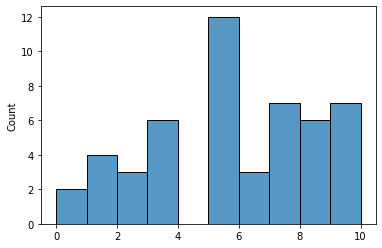

In [ ]:
test(df, 'Not Tempting Fate', 'No Load')

50
NormaltestResult(statistic=3.5895735783106186, pvalue=0.16616287629752524)


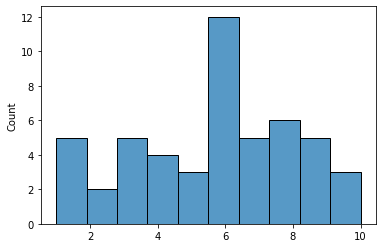

In [ ]:
test(df, 'Not Tempting Fate', 'Cognitive Load')

50
NormaltestResult(statistic=3.1345392303319657, pvalue=0.20861400196255134)


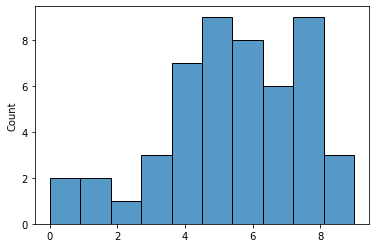

In [ ]:
test(df, 'Tempting Fate', 'No Load')

50
NormaltestResult(statistic=2.872945296661846, pvalue=0.23776496189417892)


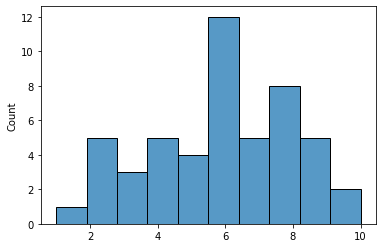

In [ ]:
test(df, 'Tempting Fate', 'Cognitive Load')

In [ ]:
model = ols('Response ~ C(CognitiveLoad) + C(TemptingFate) + C(CognitiveLoad) : C(TemptingFate)', data=df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(CognitiveLoad),6.48,1.0,1.010663,0.315984
C(TemptingFate),1.28,1.0,0.199637,0.655507
C(CognitiveLoad):C(TemptingFate),0.18,1.0,0.028074,0.867108
Residual,1256.68,196.0,NaN,NaN


Text(0, 0.5, 'Likelihood Judgements')

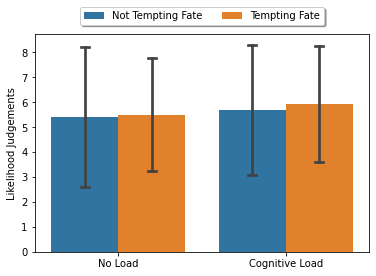

In [ ]:
sns.barplot(x='CognitiveLoad', y='Response', hue='TemptingFate', data=df, capsize=.05, ci='sd')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=5)
plt.xlabel('')
plt.ylabel('Likelihood Judgements')

In [ ]:
cl_tf = df[(df['CognitiveLoad'] == 'Cognitive Load') & (df['TemptingFate'] == 'Tempting Fate')]
cl_ntf = df[(df['CognitiveLoad'] == 'Cognitive Load') & (df['TemptingFate'] == 'Not Tempting Fate')]
stats.ttest_ind(cl_ntf['Response'], cl_tf['Response'])

Ttest_indResult(statistic=-0.4415599300481539, pvalue=0.6597804455315905)

In [ ]:
cl_tf['Response'].describe()

count    50.000000
mean      5.920000
std       2.345991
min       1.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Response, dtype: float64

In [ ]:
cl_ntf['Response'].describe()

count    50.000000
mean      5.700000
std       2.628338
min       1.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Response, dtype: float64

In [ ]:
df['Importance'].value_counts()

4    64
5    46
3    39
1    25
2    23
0     3
Name: Importance, dtype: int64

In [ ]:
df['Relevance'].value_counts()

4    61
5    42
3    33
2    26
1    22
0    16
Name: Relevance, dtype: int64

NormaltestResult(statistic=18.50289205283956, pvalue=9.597277250921565e-05)

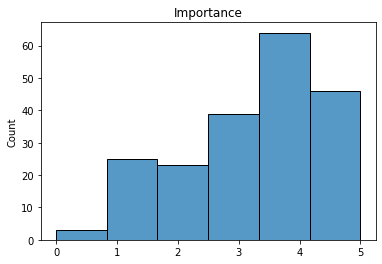

In [ ]:
sns.histplot(df['Importance'].values, bins=6).set_title('Importance')
stats.normaltest(df['Importance'])

NormaltestResult(statistic=23.263485062726318, pvalue=8.879702255013471e-06)

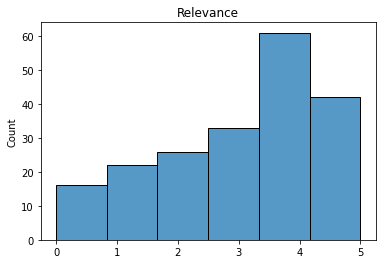

In [ ]:
sns.histplot(df['Relevance'].values, bins=6).set_title('Relevance')
stats.normaltest(df['Relevance'])

In [ ]:
stats.spearmanr(df['Importance'].values, df['Response'].values)

SpearmanrResult(correlation=0.17599268302262092, pvalue=0.01267402444571269)

In [ ]:
stats.spearmanr(df['Relevance'].values, df['Response'].values)

SpearmanrResult(correlation=0.1488450572245771, pvalue=0.03541992391429813)

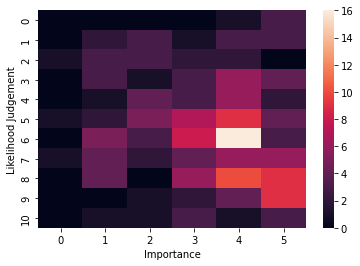

In [ ]:
from collections import Counter
def corr_test(var):
  x = list(zip(df[var].values, df['Response'].values))
  y = np.zeros((11, 6))
  c = Counter(x)
  for i in c:
    y[i[1], i[0]] = c[i]
  sns.heatmap(y)
  plt.ylabel('Likelihood Judgement')
  plt.xlabel(var)

corr_test('Importance')

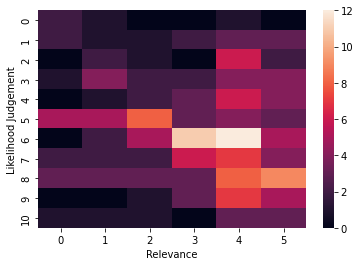

In [ ]:
corr_test('Relevance')

In [ ]:
df_important = df[df['Importance'] >= 4]
print(len(df_important))
df_important.head()

110


,Gender,Age,Education,Country,Response,Importance,Relevance,CognitiveLoad,TemptingFate
4,female,25-30,Master's degree,Australia,8,4,0,No Load,Not Tempting Fate
5,male,20-24,High School education,Spain,7,4,0,No Load,Not Tempting Fate
6,female,31-40,Bachelor's degree,USA,5,4,0,No Load,Not Tempting Fate
7,male,31-40,Bachelor's degree,Costa Rica,3,4,0,No Load,Not Tempting Fate
8,male,20-24,Bachelor's degree,Spain,1,4,0,No Load,Not Tempting Fate


37
NormaltestResult(statistic=3.0740177036708722, pvalue=0.21502330705230122)


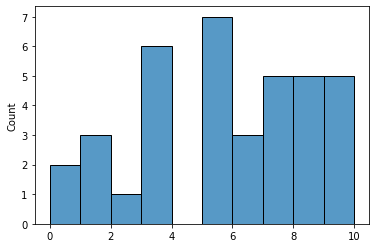

In [ ]:
test(df_important, 'Not Tempting Fate', 'No Load')

33
NormaltestResult(statistic=2.084257857883636, pvalue=0.3527030024767446)


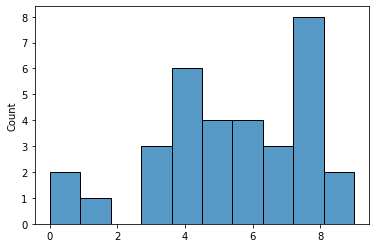

In [ ]:
test(df_important, 'Tempting Fate', 'No Load')

16
NormaltestResult(statistic=3.4086200925020522, pvalue=0.18189784398973696)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


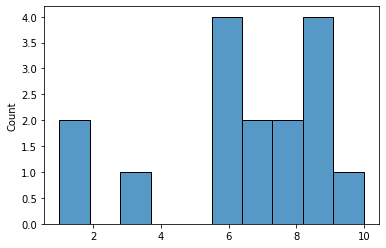

In [ ]:
test(df_important, 'Not Tempting Fate', 'Cognitive Load')

24
NormaltestResult(statistic=0.7085087036500096, pvalue=0.7016964668784453)


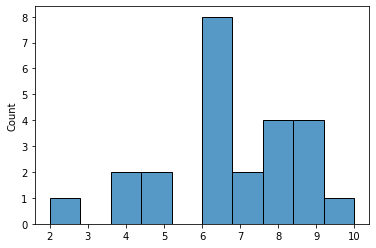

In [ ]:
test(df_important, 'Tempting Fate', 'Cognitive Load')

In [ ]:
modeli = ols('Response ~ C(CognitiveLoad) + C(TemptingFate) + C(CognitiveLoad) : C(TemptingFate)', data=df_important).fit()
sm.stats.anova_lm(modeli, typ=2)

,sum_sq,df,F,PR(>F)
C(CognitiveLoad),35.786156,1.0,5.498016,0.020901
C(TemptingFate),0.409697,1.0,0.062944,0.802388
C(CognitiveLoad):C(TemptingFate),0.005327,1.0,0.000818,0.977231
Residual,689.945690,106.0,NaN,NaN


Text(0, 0.5, 'Likelihood Judgements')

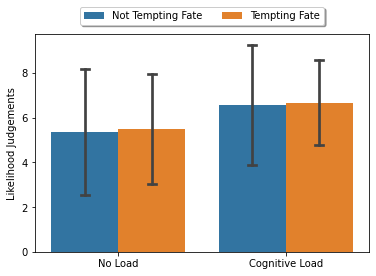

In [ ]:
sns.barplot(x='CognitiveLoad', y='Response', hue='TemptingFate', data=df_important, capsize=.05, ci='sd')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=5)
plt.xlabel('')
plt.ylabel('Likelihood Judgements')

Text(0, 0.5, 'Likelihood Judgements')

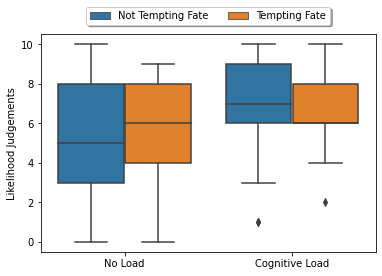

In [ ]:
sns.boxplot(x='CognitiveLoad', y='Response', hue='TemptingFate', data=df_important)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=5)
plt.xlabel('')
plt.ylabel('Likelihood Judgements')

In [ ]:
cl = df_important[(df_important['CognitiveLoad'] == 'Cognitive Load')]
ncl = df_important[(df_important['CognitiveLoad'] == 'No Load')]
stats.ttest_ind(cl['Response'], ncl['Response'])

Ttest_indResult(statistic=2.4160069707170733, pvalue=0.017369274829381276)

In [ ]:
cl['Response'].describe()

count    40.000000
mean      6.625000
std       2.272325
min       1.000000
25%       6.000000
50%       6.500000
75%       8.250000
max      10.000000
Name: Response, dtype: float64

In [ ]:
ncl['Response'].describe()

count    70.000000
mean      5.414286
std       2.662095
min       0.000000
25%       3.250000
50%       5.500000
75%       8.000000
max      10.000000
Name: Response, dtype: float64

In [ ]:
df_rel = df[df['Relevance'] >= 4]
print(len(df_rel))
df_rel.head()

103


,Gender,Age,Education,Country,Response,Importance,Relevance,CognitiveLoad,TemptingFate
40,non-binary,Above 40,Bachelor's degree,Spain,7,1,4,No Load,Not Tempting Fate
41,female,20-24,Master's degree,Hungary,2,2,4,No Load,Not Tempting Fate
42,male,20-24,Bachelor's degree,Spain,10,3,4,No Load,Not Tempting Fate
43,male,20-24,Bachelor's degree,Colombia,7,4,4,No Load,Not Tempting Fate
44,female,20-24,High School education,Finland,3,4,4,No Load,Not Tempting Fate


In [ ]:
modelr = ols('Response ~ C(CognitiveLoad) + C(TemptingFate) + C(CognitiveLoad) : C(TemptingFate)', data=df_rel).fit()
sm.stats.anova_lm(modelr, typ=2)

,sum_sq,df,F,PR(>F)
C(CognitiveLoad),1.319441,1.0,0.183364,0.669428
C(TemptingFate),0.004929,1.0,0.000685,0.979173
C(CognitiveLoad):C(TemptingFate),0.278787,1.0,0.038743,0.844362
Residual,712.378889,99.0,NaN,NaN


Text(0, 0.5, 'Likelihood Judgements')

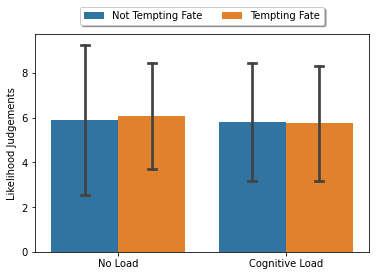

In [ ]:
sns.barplot(x='CognitiveLoad', y='Response', hue='TemptingFate', data=df_rel, capsize=.05, ci='sd')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=5)
plt.xlabel('')
plt.ylabel('Likelihood Judgements')

No handles with labels found to put in legend.


Text(0, 0.5, 'Likelihood Judgements')

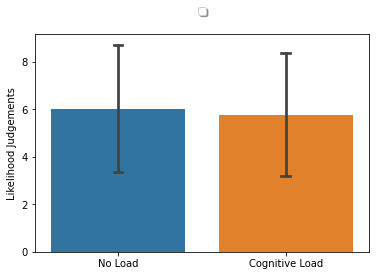

In [ ]:
sns.barplot(x='CognitiveLoad', y='Response', data=df_rel, capsize=.05, ci='sd')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=5)
plt.xlabel('')
plt.ylabel('Likelihood Judgements')

In [ ]:
cl = df_rel[(df_rel['CognitiveLoad'] == 'Cognitive Load')]
ncl = df_rel[(df_rel['CognitiveLoad'] == 'No Load')]
stats.ttest_ind(cl['Response'], ncl['Response'])

Ttest_indResult(statistic=-1.6616851436356699, pvalue=0.10439483896818869)

In [ ]:
stats.spearmanr(df['Importance'], df['Relevance'])

SpearmanrResult(correlation=0.07550293894658447, pvalue=0.2879645268268142)

In [ ]:
def corr_imp_rel():
  x = list(zip(df['Importance'].values, df['Relevance'].values))
  y = np.zeros((6, 6))
  c = Counter(x)
  for i in c:
    y[i[0], i[1]] = c[i]
  sns.heatmap(y)
  plt.xlabel('Importance')
  plt.ylabel('Relevance')

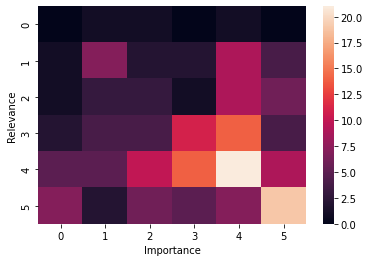

In [ ]:
corr_imp_rel()

In [ ]:
# For the presentation, chart of Study 2 results.

<BarContainer object of 2 artists>

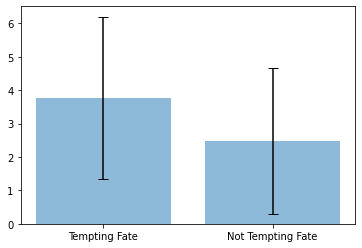

In [ ]:
plt.bar(['Tempting Fate', 'Not Tempting Fate'], [3.77, 2.47], yerr=[2.43, 2.19], align='center', alpha=0.5, ecolor='black', capsize=5)

In [ ]:
s1 = np.random.normal(3.77, 2.43, 29)

In [ ]:
s2 = np.random.normal(2.47, 2.19, 29)

In [ ]:
stats.ttest_ind(s1, s2)

Ttest_indResult(statistic=2.383546698426849, pvalue=0.020562256031200318)

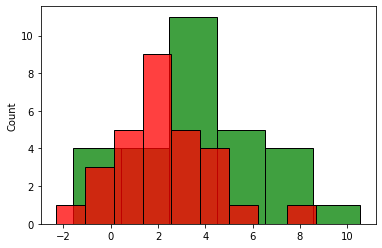

In [ ]:
sns.histplot(s1, color='g')
sns.histplot(s2, color='r')